In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import galactic_wavelets as gw
import torch

In [2]:
N = 128
quijote_dir = '/mnt/ceph/users/fvillaescusa/Quijote/3D_cubes/'
test_df = quijote_dir+f'fiducial/0/df_m_{N}_CIC_z=0.npy'

device = 0

In [3]:
df = torch.from_numpy(np.load(os.path.join(quijote_dir, test_df))).to(device)
df_shape = df.shape
N = df_shape[0]
print("Shape of the density field: ", df_shape)
print("Min/max/mean of the density field: ", df.min(), df.max(), df.mean())

Shape of the density field:  torch.Size([128, 128, 128])
Min/max/mean of the density field:  tensor(-0.9404, device='cuda:0') tensor(56.0308, device='cuda:0') tensor(-3.4925e-10, device='cuda:0')


In [4]:
J = 6
Q = 1
kc = np.pi
erosion_threshold = None
angular_width = np.pi/4

In [5]:
wst_op = gw.ScatteringOp((N, N, N),
                         J,
                         Q=Q,
                         kc=kc,
                         erosion_threshold=erosion_threshold,
                         scattering=True,
                         los=(1, 0, 0),
                         angular_width=angular_width,
                         device=device)

Computing wavelets...


Done!


In [6]:
s0_new, s1_new, s2_new = wst_op(df)
s0_new, s1_new, s2_new = s0_new.cpu().numpy(), s1_new.cpu().numpy(), s2_new.cpu().numpy()

Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Computing S2 coefficients...
Done!


In [7]:
wst_op_legacy = gw.ScatteringOp_legacy(J,
                                       Q=Q,
                                       kc=kc, erosion_threshold=erosion_threshold, scattering=True, angular_width=angular_width,
                                       Ngrid=(N, N, N))
wst_op_legacy.build_wavelets()

Computing wavelets...


Done!


In [8]:
s0_ref, s1_ref, s2_ref = wst_op_legacy(df.cpu().numpy())

Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Computing S2 coefficients...
Done!


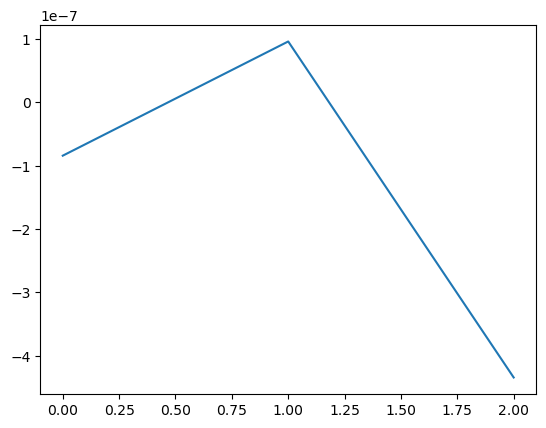

In [9]:
plt.figure()
plt.plot((s0_new.ravel() - s0_ref.ravel())/ s0_ref.ravel())

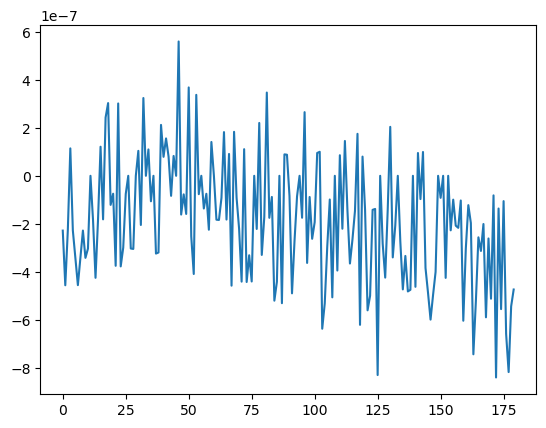

In [10]:
plt.figure()
plt.plot((s1_new.ravel() - s1_ref.ravel())/ s1_ref.ravel())

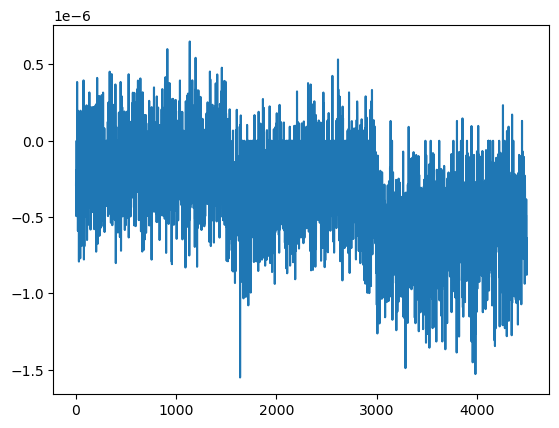

In [11]:
plt.figure()
plt.plot((s2_new.ravel() - s2_ref.ravel())/ s2_ref.ravel())